In [1]:
############################################################################# 
# Crop and concatenate ONI files                                            # 
# Josh Titlow- 13 February, 2019                                            #
#                                                                           # 
# ---PROCESSING STEPS----                                                   #
# 1. Convert .tiff series to .h5 using bfconvert                            #
# 2. Crop the PAINT channel and save as .raw file for picasso               #
#                                                                           #
# --- USAGE----                                                             #
# 1. Provide indirectory                                                    #
# 2. Provide filename pattern                                               # 
#############################################################################

import numpy as np
from skimage.util import crop
import tifffile
import os


# Get files
indir = '/Users/joshtitlow/tmp/PAINT/'
filename_pattern = '20190108_rRNA_n1_LP50_imageATTO655_msp570.1546963510944'
infiles = os.listdir(indir)

# Initiate empty array
merge = np.empty((0, 1024, 414))

# Crop image and add to array
for file in infiles:
    if file.startswith(filename_pattern) and file.endswith('.tif'):
        print "cropping:", file
        file_path = os.path.join(indir, file)
        
        im = tifffile.imread(file_path)
        crop_amt = ((0, 0), (0, 0), (610, 0))
        im = crop(im,crop_amt)
        merge = np.concatenate((merge, im), axis=0)

# make sure data are in correct format        
print (merge.shape)

merge.astype('uint16').tofile('filename3.raw') 

cropping: 20190108_rRNA_n1_LP50_imageATTO655_msp570.1546963510944_0.tif
cropping: 20190108_rRNA_n1_LP50_imageATTO655_msp570.1546963510944_1.tif
(2042, 1024, 414)


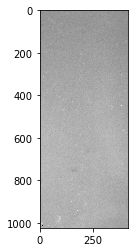

In [2]:
# Visualise results
%matplotlib inline

from skimage import io
from skimage import exposure
from matplotlib import pyplot as plt

# show image
#plt.imshow(im[4], cmap='gray')

# show log stretch
log_img = exposure.adjust_log(im[4], 10)
plt.imshow(log_img, cmap='gray')

# adjust gamma
#gamma_img = exposure.adjust_gamma(im, 1)
#plt.imshow(gamma_img[0, 15,0], cmap='gray')

In [7]:
import numpy as np
from skimage.util import crop
import tifffile
import os


im = tifffile.imread('/Users/joshtitlow/OneDrive - Nexus365/AdultBrain_smFISH/20190130_AdultBrain_RG03C_CamkIIYFP_smFISH_learning/2019030_RGGC08_CamKIIYFP_smFISH_O_p4_4col_cal.ome.tiff')
im = np.rollaxis(im,0,2)
tifffile.imsave('/Users/joshtitlow/tmp/AdultBrain_smFISH/2019023_RGGC08_CamKIIYFP_smFISH_1h_p1dendr.tif', im, imagej = True)



In [2]:
im.shape

(79, 4, 512, 512)

In [39]:
import javabridge as jv
import bioformats as bf

jv.start_vm(class_path=bf.JARS, max_heap_size='8G')

path = '/Users/joshtitlow/OneDrive - Nexus365/AdultBrain_smFISH/20190130_AdultBrain_RG03C_CamkIIYFP_smFISH_learning/2019030_RGGC08_CamKIIYFP_smFISH_O_p4_4col_cal.ome.tiff'
#rdr = bf.ImageReader(path)
#im = rdr.read(0,0,0)
rdr = bf.load_image(path, c=3, z=40)

#jv.kill_vm()

JavaException: Invalid Z index: 40/1

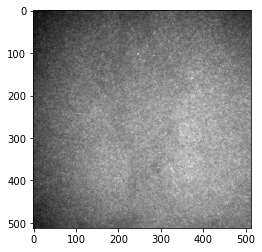

In [24]:
# Visualise results
%matplotlib inline

from skimage import io
from skimage import exposure
from matplotlib import pyplot as plt

plt.imshow(rdr, cmap='gray')

In [4]:
im = rdr.read(c=0, z=0, t=0)

In [34]:
im = np.array(rdr)

In [62]:
im.shape

(79, 512, 512, 4)

In [67]:
im = np.rollaxis(im,0,2)
im.shape

(79, 4, 512, 512)

In [20]:
import os

file = 'None.png'

file = os.path.basename(file)
print file
newfile = file.replace(file, file + '.tif') # input file suffix
print "newfile =", newfile

None.png
newfile = None.png.tif


In [81]:
import numpy as np
from skimage.util import crop
import tifffile
import os

# Get infiles
indir = '/Volumes/bioc1301/data/20190220_AdultBrain_MB077c_CamKYFP_smFISH_learning/'
infiles = os.listdir(indir)

# Setup outdir
if not os.path.exists(os.path.join(indir, 'aligned')):
    os.makedirs(os.path.join(indir, 'aligned'))
    outdir = os.path.join(indir, 'aligned')
else: 
    print 'aligned directory already exists'
    
# Convert .ome.tiff to .tiff 
for file in infiles: 
    if file.endswith('.tiff'):
        
        file_path = os.path.join(indir, file)
        print 'old file is:', file_path
        out_file = os.path.join(outdir, file.split('.')[0]+'.tif')
        
        im = tifffile.imread(file_path)
        im = np.rollaxis(im,0,2)
        tifffile.imsave(out_file, im, imagej = True)

        print 'new file is:', out_file
        
        

old file is: /Volumes/bioc1301/data/20190220_AdultBrain_MB077c_CamKYFP_smFISH_learning/20190220_MB077c_act5cMS2_670_myrSNAP549_MCPGFP_violet_p1lcalyx.ome.tiff
new file is: /Volumes/bioc1301/data/20190220_AdultBrain_MB077c_CamKYFP_smFISH_learning/aligned/20190220_MB077c_act5cMS2_670_myrSNAP549_MCPGFP_violet_p1lcalyx.tif
old file is: /Volumes/bioc1301/data/20190220_AdultBrain_MB077c_CamKYFP_smFISH_learning/20190220_MB077c_act5cMS2_670_myrSNAP549_MCPGFP_violet_p1lsoma.ome.tiff
new file is: /Volumes/bioc1301/data/20190220_AdultBrain_MB077c_CamKYFP_smFISH_learning/aligned/20190220_MB077c_act5cMS2_670_myrSNAP549_MCPGFP_violet_p1lsoma.tif
old file is: /Volumes/bioc1301/data/20190220_AdultBrain_MB077c_CamKYFP_smFISH_learning/20190220_MB077c_act5cMS2_670_myrSNAP549_MCPGFP_violet_p1cal.ome.tiff
new file is: /Volumes/bioc1301/data/20190220_AdultBrain_MB077c_CamKYFP_smFISH_learning/aligned/20190220_MB077c_act5cMS2_670_myrSNAP549_MCPGFP_violet_p1cal.tif
old file is: /Volumes/bioc1301/data/20190220_

In [80]:
#new = file.split('.')[0]+'.tif'
#new = new[0]
#new
infiles = os.listdir(outdir)

for file in infiles: 
    if file.endswith('.tif'):
        file_string = file.split('.')[0]
        for target in infiles:
            if file_string in target:
                print target

20190221_sggYFP_24hr_culture_severed_p1s3l.tif
20190221_sggYFP_24hr_culture_severed_p1s3l_calibration.tif
20190221_sggYFP_24hr_culture_severed_p1s4l.tif
20190221_sggYFP_24hr_culture_severed_p1s4l_calibration.tif
20190221_sggYFP_24hr_culture_severed_p1s5l.tif
20190221_sggYFP_24hr_culture_severed_p1s5l_calibration.tif
20190221_sggYFP_24hr_culture_severed_p1s5r.tif
20190221_sggYFP_24hr_culture_severed_p1s5r_calibration.tif
20190221_sggYFP_24hr_culture_severed_p1s4r.tif
20190221_sggYFP_24hr_culture_severed_p1s4r_calibration.tif
20190221_sggYFP_24hr_culture_severed_p1s3r.tif
20190221_sggYFP_24hr_culture_severed_p1s3r_calibration.tif
20190221_sggYFP_24hr_culture_intact_p1s3l.tif
20190221_sggYFP_24hr_culture_intact_p1s3l_calibration.tif
20190221_sggYFP_24hr_culture_intact_p1s4l.tif
20190221_sggYFP_24hr_culture_intact_p1s4l_calibration.tif
20190221_sggYFP_24hr_culture_intact_p1s5l.tif
20190221_sggYFP_24hr_culture_intact_p1s5l_calibration.tif
20190221_sggYFP_24hr_culture_intact_p1s5r.tif
201902

In [43]:
import os
indir = '/Users/joshtitlow/tmp/AdultBrain_smFISH/test/'
if not os.path.exists(os.path.join(indir, 'aligned')):
    outdir = os.makedirs(os.path.join(indir, 'aligned'))
    outdir = os.path.join(indir, 'aligned')
else: 
    print 'aligned directory already exists'

/Users/joshtitlow/tmp/AdultBrain_smFISH/test/aligned


In [4]:
from subprocess import Popen, PIPE

#subprocess.Popen("python /Users/joshtitlow/src/PythonScripts/test.py")

process = Popen(['python', '/Users/joshtitlow/src/PythonScripts/test.py'], stdout=PIPE, stderr=PIPE)
stdout, stderr = process.communicate()
print stdout


works



In [57]:
subprocess.check_output(['python', '/Users/joshtitlow/src/PythonScripts/test.py'])

'works\n'

In [61]:
stdout

'works\n'

In [59]:
stderr

'Vendor:  continuum\nProduct: anaconda\nMessage: trial mode expires in 25 days\n'

In [82]:
target_list = []
reference_list = []

for file in out_file:
    if file.endswith('.tif')
        reference_list[file]
print reference_list

SyntaxError: invalid syntax (<ipython-input-82-68accedb66dd>, line 5)

In [ ]:
from subprocess import Popen, PIPE

#subprocess.Popen("python /Users/joshtitlow/src/PythonScripts/test.py")

process = Popen(['chromagnon', '/Users/joshtitlow/src/PythonScripts/test.py'], stdout=PIPE, stderr=PIPE)
#stdout, stderr = process.communicate()
print stdout